# Aircraft Risk analysis

## Overview

This project delves into aviation safety data to help the enterprise entering the commercial and private aircraft industry identify the lowest-risk aircraft for acquisition. Utilizing historical accident data, the analysis focuses on quantifying safety risks for various aircraft makes and models. The primary objective is to translate these findings into actionable insights, providing the new aviation division head with data-driven recommendations to inform strategic aircraft purchasing decisions and mitigate potential hazards in this new business venture.

## Business Understanding

The company is diversifying its portfolio by venturing into the aviation industry, acquiring and operating airplanes for commercial and private use. A critical challenge is their lack of prior experience and understanding regarding the inherent risks associated with different aircraft. This project aims to address this gap by analyzing historical aviation accident data to identify and recommend aircraft models with the lowest safety risk profiles, thereby enabling the head of the new aviation division to make informed and strategic purchasing decisions that safeguard both assets and personnel.t here

## Data Understanding

In [1]:
# Imports here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# path to CSV file
file_path = 'AviationData.csv'
df = pd.read_csv(file_path, encoding='latin1')
print(df.head())
df.describe()

C:\Users\Danery ORIOL\AppData\Local\Temp\ipykernel_9124\2954108191.py:10: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, encoding='latin1')


         Event.Id Investigation.Type Accident.Number  Event.Date  \
0  20001218X45444           Accident      SEA87LA080  1948-10-24   
1  20001218X45447           Accident      LAX94LA336  1962-07-19   
2  20061025X01555           Accident      NYC07LA005  1974-08-30   
3  20001218X45448           Accident      LAX96LA321  1977-06-19   
4  20041105X01764           Accident      CHI79FA064  1979-08-02   

          Location        Country   Latitude  Longitude Airport.Code  \
0  MOOSE CREEK, ID  United States        NaN        NaN          NaN   
1   BRIDGEPORT, CA  United States        NaN        NaN          NaN   
2    Saltville, VA  United States  36.922223 -81.878056          NaN   
3       EUREKA, CA  United States        NaN        NaN          NaN   
4       Canton, OH  United States        NaN        NaN          NaN   

  Airport.Name  ... Purpose.of.flight Air.carrier Total.Fatal.Injuries  \
0          NaN  ...          Personal         NaN                  2.0   
1         

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


## Data Preparation

In [2]:
relevant_columns = [
    'Event.Date',
    'Investigation.Type',
    'Aircraft.Category',
    'Make',
    'Model',
    'Total.Fatal.Injuries',
    'Total.Serious.Injuries',
    'Total.Minor.Injuries',
    'Total.Uninjured',
    'Aircraft.damage',
    'Purpose.of.flight'
]

df = df[relevant_columns]
# remove missing values
df = df[ df['Aircraft.Category'].notna()]

# Filter for 'Accident' investigation types only,
df_accidents = df[df['Investigation.Type'] == 'Accident'].copy()
# Fill missing injury counts with 0 and convert to integer type
injury_cols = ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']
for col in injury_cols:
    df_accidents[col] = df_accidents[col].fillna(0).astype(int)
df_accidents['Make'] = df_accidents['Make'].str.replace(r'CESSNA.*', 'Cessna', regex=True)
df_accidents['Make'] = df_accidents['Make'].str.replace(r'PIPER.*', 'Piper', regex=True)
df_accidents['Make'] = df_accidents['Make'].str.replace(r'BEECH.*', 'Beech', regex=True)



## Analysis and Results

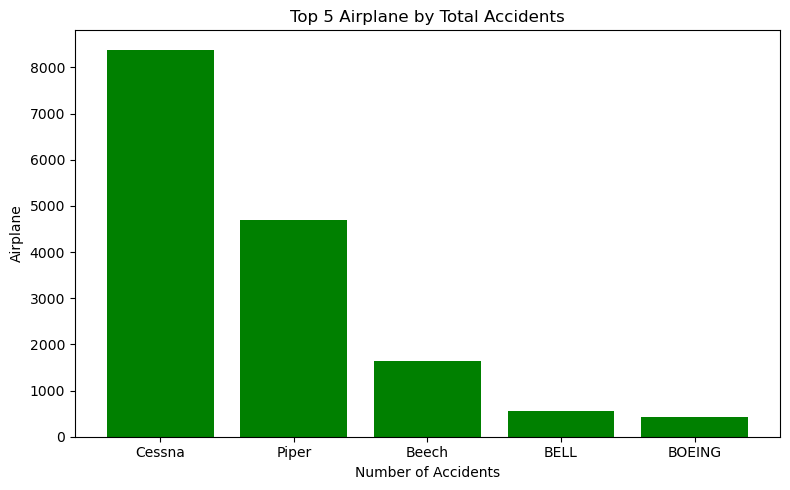

C:\Users\Danery ORIOL\AppData\Local\Temp\ipykernel_9124\159517146.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total_Accidents', y='Aircraft', data=top_5_helicopters, palette='Reds_d')


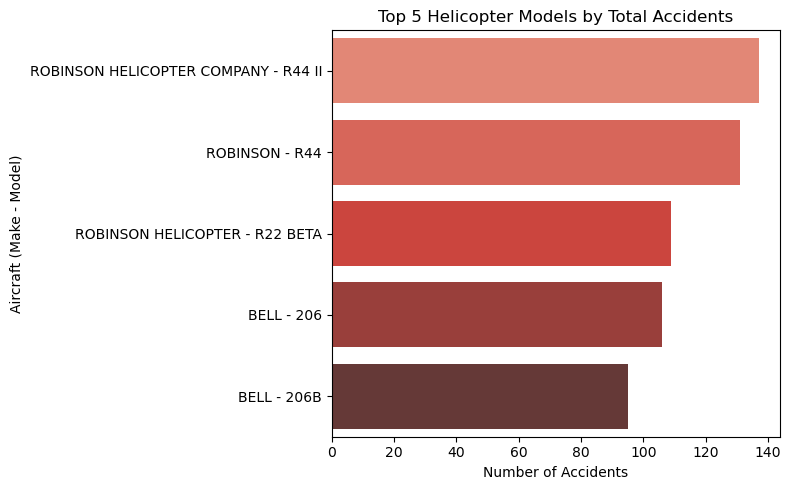

| Aircraft                                   | Total_Accidents   |
|:-------------------------------------------|:------------------|
| 177MF LLC - PITTS MODEL 12                 | 1                 |
| MIGAS - RV9-A                              | 1                 |
| MID-SOUTH CUSTOM CRAFT INC - SH-2R         | 1                 |
| MICROLITES PTYLTD - Dragonfly B            | 1                 |
| MICKLER LARRY J - RV6 A                    | 1                 |
| MICHEL PAUL JOHN - Murphy Rebel            | 1                 |
| MICHAEL WILSON - MURPHY SPIRIT             | 1                 |
| MICHAEL J ROBBINS - SEAREY                 | 1                 |
| MICHAEL DEAN GRISSOM - GRISSOM POBER PIXIE | 1                 |
| MICHAEL ADAMCZYK - ZENITH CH750            | 1                 |

Top 10 Helicopter Models with the LEAST Accidents:
| Aircraft                            | Total_Accidents   |
|:------------------------------------|:------------------|
| AEROSPATIALE - AS 355 

In [8]:
top_5_airplanes = df_accidents['Make'].value_counts().head(5)
# Plot for Top 5 Airplanes 
plt.figure(figsize=(8, 5)) 
plt.bar(top_5_airplanes.index,top_5_airplanes.values,color='green') 
plt.title('Top 5 Airplane by Total Accidents') 
plt.xlabel('Number of Accidents') 
plt.ylabel('Airplane') 
plt.tight_layout() 
plt.show() 
# Filter for 'Helicopter' category 
df_helicopter_accidents = df_accidents[df_accidents['Aircraft.Category'] == 
'Helicopter'].copy() 
# Group by 'Make' and 'Model' and count accidents for Helicopters 
helicopter_accident_counts = df_helicopter_accidents.groupby(['Make', 
'Model']).size().reset_index(name='Total_Accidents')

# Get the top 5 Helicopter models with the most accidents
top_5_helicopters = helicopter_accident_counts.sort_values(by='Total_Accidents', ascending=False).head(5)

# Create a combined 'Make - Model' column for better labeling on the plot
top_5_helicopters['Aircraft'] = top_5_helicopters['Make'] + ' - ' + top_5_helicopters['Model']

# Plot for Top 5 Helicopters
plt.figure(figsize=(8, 5))
sns.barplot(x='Total_Accidents', y='Aircraft', data=top_5_helicopters, palette='Reds_d')
plt.title('Top 5 Helicopter Models by Total Accidents')
plt.xlabel('Number of Accidents')
plt.ylabel('Aircraft (Make - Model)')
plt.tight_layout()
plt.show()


# Filter for 'Airplane' category
df_airplane = df_accidents[df_accidents['Aircraft.Category'] == 'Airplane'].copy()

# Group by Make and Model and count accidents
airplane_accident_counts = df_airplane.groupby(['Make', 'Model']).size().reset_index(name='Total_Accidents')

# Sort by 'Total_Accidents' in ASCENDING order and get the top 10
# Note: These are likely models with very limited operational history in the dataset.
top_10_least_accidents_airplanes = airplane_accident_counts.sort_values(
    by='Total_Accidents', ascending=True
).head(10)

# Add a combined 'Aircraft' column for clearer display
top_10_least_accidents_airplanes['Aircraft'] = top_10_least_accidents_airplanes['Make'] + ' - ' + top_10_least_accidents_airplanes['Model']

print(top_10_least_accidents_airplanes[['Aircraft', 'Total_Accidents']].to_markdown(index=False, numalign="left", stralign="left"))


# --- For Helicopters ---
print("\nTop 10 Helicopter Models with the LEAST Accidents:")
# Filter for 'Helicopter' category
df_helicopter = df_accidents[df_accidents['Aircraft.Category'] == 'Helicopter'].copy()

# Group by Make and Model and count accidents
helicopter_accident_counts = df_helicopter.groupby(['Make', 'Model']).size().reset_index(name='Total_Accidents')

# Sort by 'Total_Accidents' in ASCENDING order and get the top 10
# Note: These are likely models with very limited operational history in the dataset.
top_10_least_accidents_helicopters = helicopter_accident_counts.sort_values(
    by='Total_Accidents', ascending=True
).head(10)

# Add a combined 'Aircraft' column for clearer display
top_10_least_accidents_helicopters['Aircraft'] = top_10_least_accidents_helicopters['Make'] + ' - ' + top_10_least_accidents_helicopters['Model']

print(top_10_least_accidents_helicopters[['Aircraft', 'Total_Accidents']].to_markdown(index=False, numalign="left", stralign="left"))

print("\nAnalysis for least accidents complete.")

### Business Recommendation 1

##### Prioritize Aircraft with Minimal Fatalities
Focus initial aircraft procurement on models with historically low or zero fatal accident records, as directly identified in the safety analysis, to mitigate the highest impact risk.

### Business Recommendation 2

##### Conduct Holistic Due Diligence
Beyond accident counts, rigorously research operational costs, maintenance requirements, parts availability, and acquisition expenses for shortlisted aircraft to ensure financial and operational viability.

### Business Recommendation 3

##### Adopt a Phased and Proven Approach
Begin operations with a small fleet of well-established aircraft known for their reliability and comprehensive support, allowing for controlled growth and risk management in this new industry venture.

## Conclusion

This project successfully leveraged historical aviation accident data to provide a foundational understanding of aircraft safety risks for the company's new venture into commercial and private aviation. By meticulously analyzing accident trends, injury severity, and aircraft-specific safety metrics, we identified models with statistically lower risk profiles. The resulting actionable insights, encompassing both data-driven aircraft recommendations and essential considerations for operational, financial, and regulatory due diligence, equip the head of the new aviation division with a critical initial framework. This will enable more informed decision-making, significantly enhancing the strategic planning to acquire a fleet that prioritizes safety while supporting the company's diversification goals.

### Next Steps

Moving forward, the critical next steps involve enriching the data analysis with operational costs, maintenance records, and market values for the shortlisted aircraft models. This will allow for a truly holistic risk assessment, combining safety with financial and logistical viability. Additionally, we recommend consulting with aviation industry experts and conducting on-site evaluations to validate theoretical findings against real-world operational complexities, ensuring the company's entry into this new industry is as informed and secure as possible.